**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial Aplica a Saude

Prof. 
Arlindo Galvão

---

Aluna(o): 
Juliana Resplande

---

In [ ]:
!pip install -U scikit-learn

In [ ]:
from sklearn.calibration import CalibrationDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    RandomizedSearchCV,
)

from sklearn.metrics import (
    ConfusionMatrixDisplay,
    PrecisionRecallDisplay,
    classification_report,
    RocCurveDisplay,
    DetCurveDisplay,
)
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

sklearn.set_config(display="diagram")

LABEL_COLUMN = 'Diagnosis'
SEED = 42

In [ ]:
# https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'], columns=[LABEL_COLUMN])
df = pd.concat([X, y], axis=1)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
train, test = [], []
for label in df[LABEL_COLUMN].unique():
    dataset_class = df[df[LABEL_COLUMN] == label]
    class_train_set, class_test_set = train_test_split(dataset_class, test_size=0.25, shuffle=False)

    train.append(class_train_set)
    test.append(class_test_set)

train = pd.concat(train)
test = pd.concat(test)

X_train, y_train = train.drop(columns=[LABEL_COLUMN]), train[LABEL_COLUMN] 
X_test, y_test = test.drop(columns=[LABEL_COLUMN]), test[LABEL_COLUMN]

In [ ]:
# Define parâmetros para buscar a melhorar configuração durante o treinamento
mlp_param_grid = [
    {
        'activation': ['logistic', 'tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'random_state': [SEED],
        'learning_rate_init':  0.1 ** np.arange(3),
        'alpha': 0.1 ** np.arange(3),
     }
]

strat_k_fold = StratifiedKFold(
     n_splits=10,
     random_state=SEED,
     shuffle=True,
)

clf = GridSearchCV(
    MLPClassifier(),
    mlp_param_grid,
    cv=strat_k_fold,
    scoring=['accuracy', 'neg_log_loss'],
    refit='neg_log_loss',
    return_train_score=True,
    n_jobs=2,
    verbose=True,
)

pipe = make_pipeline(
    StandardScaler(),
    clf,
    verbose=True       
)

pipe.fit(X_train, y_train)

[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
Fitting 10 folds for each of 54 candidates, totalling 540 fits
[Pipeline] ...... (step 2 of 2) Processing gridsearchcv, total= 2.2min


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                              estimator=MLPClassifier(), n_jobs=2,
                              param_grid=[{'activation': ['logistic', 'tanh',
                                                          'relu'],
                                           'alpha': array([1.  , 0.1 , 0.01]),
                                           'learning_rate_init': array([1.  , 0.1 , 0.01]),
                                           'random_state': [42],
                                           'solver': ['sgd', 'adam']}],
                              refit='neg_log_loss', return_train_score=True,
                              scoring=['accuracy', 'neg_log_loss'],
                              verbose=True))],
         verbose=True)

In [ ]:
clf.best_estimator_

MLPClassifier(alpha=1.0, learning_rate_init=0.1, random_state=42, solver='sgd')

# Resultados

In [ ]:
Y_test = pipe.predict(X_test)
print(classification_report(y_test, Y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



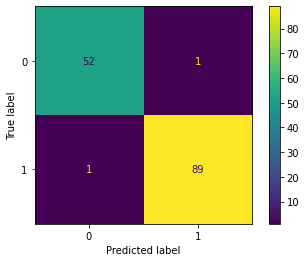

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, Y_test)

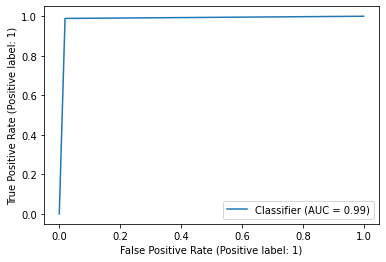

In [ ]:
RocCurveDisplay.from_predictions(y_test, Y_test)

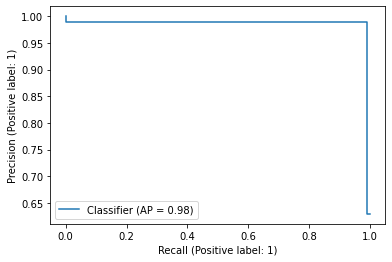

In [ ]:
PrecisionRecallDisplay.from_predictions(y_test, Y_test)

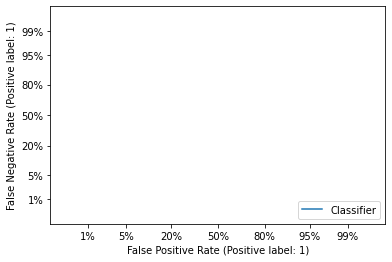

In [ ]:
DetCurveDisplay.from_predictions(y_test, Y_test)

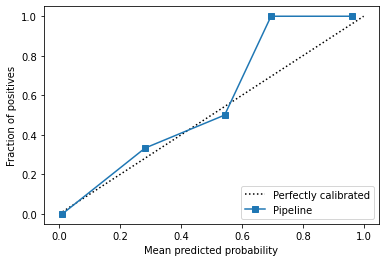

In [ ]:
CalibrationDisplay.from_estimator(pipe, X_test, y_test)

In [ ]:
clf_train_results = pd.DataFrame(clf.cv_results_)
clf_train_results

,iter,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_learning_rate_init,param_random_state,param_solver,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,split5_test_accuracy,split6_test_accuracy,split7_test_accuracy,split8_test_accuracy,split9_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,split5_train_accuracy,split6_train_accuracy,split7_train_accuracy,split8_train_accuracy,split9_train_accuracy,mean_train_accuracy,std_train_accuracy,split0_test_neg_log_loss,split1_test_neg_log_loss,split2_test_neg_log_loss,split3_test_neg_log_loss,split4_test_neg_log_loss,split5_test_neg_log_loss,split6_test_neg_log_loss,split7_test_neg_log_loss,split8_test_neg_log_loss,split9_test_neg_log_loss,mean_test_neg_log_loss,std_test_neg_log_loss,rank_test_neg_log_loss,split0_train_neg_log_loss,split1_train_neg_log_loss,split2_train_neg_log_loss,split3_train_neg_log_loss,split4_train_neg_log_loss,split5_train_neg_log_loss,split6_train_neg_log_loss,split7_train_neg_log_loss,split8_train_neg_log_loss,split9_train_neg_log_loss,mean_train_neg_log_loss,std_train_neg_log_loss
0,0,0.351028,0.071796,0.004432,0.002064,logistic,1,1,42,sgd,"{'activation': 'logistic', 'alpha': 1.0, 'lear...",0.976744,1.000000,0.976744,0.976744,0.953488,0.976744,0.952381,1.00000,0.976190,1.000000,0.978904,0.016464,3,0.984334,0.984334,0.984334,0.984334,0.984334,0.986945,0.981771,0.981771,0.986979,0.981771,0.984091,0.001815,-0.109141,-4.701953e-02,-0.115350,-0.074673,-0.107222,-0.083832,-1.058920e-01,-2.560810e-02,-0.142789,-1.482969e-02,-0.082636,0.039648,14,-0.069979,-0.076693,-0.068986,-0.071738,-0.069485,-0.071682,-0.069693,-0.076850,-0.062656,-0.077819,-0.071558,0.004356
1,1,0.272437,0.032284,0.003750,0.000100,logistic,1,1,42,adam,"{'activation': 'logistic', 'alpha': 1.0, 'lear...",0.930233,1.000000,0.930233,0.976744,0.930233,0.953488,0.952381,1.00000,0.952381,1.000000,0.962569,0.027984,40,0.971279,0.960836,0.976501,0.981723,0.968668,0.966057,0.958333,0.973958,0.968750,0.979167,0.970527,0.007192,-0.227483,-6.142601e-02,-0.170758,-0.104053,-0.131727,-0.136588,-1.339623e-01,-2.924340e-02,-0.170314,-2.247882e-02,-0.118803,0.062198,34,-0.093726,-0.112346,-0.092392,-0.095230,-0.091824,-0.100600,-0.115407,-0.083062,-0.080229,-0.090735,-0.095555,0.010691
2,2,0.637346,0.038822,0.004400,0.001348,logistic,1,0.1,42,sgd,"{'activation': 'logistic', 'alpha': 1.0, 'lear...",0.976744,1.000000,0.976744,0.976744,0.953488,0.976744,0.952381,1.00000,0.976190,1.000000,0.978904,0.016464,3,0.981723,0.981723,0.984334,0.984334,0.984334,0.986945,0.981771,0.981771,0.984375,0.981771,0.983308,0.001722,-0.111073,-4.610697e-02,-0.113465,-0.075589,-0.107560,-0.083061,-1.060771e-01,-2.607255e-02,-0.138962,-1.455906e-02,-0.082253,0.039140,12,-0.070320,-0.076618,-0.068662,-0.071847,-0.069030,-0.071348,-0.069163,-0.076587,-0.062597,-0.077783,-0.071395,0.004380
3,3,0.230184,0.033070,0.003791,0.000054,logistic,1,0.1,42,adam,"{'activation': 'logistic', 'alpha': 1.0, 'lear...",0.976744,1.000000,0.953488,0.976744,0.953488,0.976744,0.928571,1.00000,0.976190,1.000000,0.974197,0.022272,19,0.979112,0.979112,0.981723,0.979112,0.976501,0.986945,0.979167,0.973958,0.979167,0.973958,0.978876,0.003572,-0.110572,-5.784099e-02,-0.105811,-0.070689,-0.110142,-0.082309,-1.356593e-01,-2.713429e-02,-0.155420,-1.465869e-02,-0.087024,0.042953,20,-0.074060,-0.080984,-0.071297,-0.074388,-0.077506,-0.069825,-0.076121,-0.078066,-0.069223,-0.079023,-0.075049,0.003795
4,4,0.802130,0.007981,0.003788,0.000107,logistic,1,0.01,42,sgd,"{'activation': 'logistic', 'alpha': 1.0, 'lear...",0.953488,1.000000,0.976744,0.976744,0.953488,0.976744,0.976190,1.00000,0.976190,1.000000,0.978959,0.016296,2,0.981723,0.979112,0.981723,0.979112,0.981723,0.981723,0.981771,0.976562,0.981771,0.981771,0.980699,0.001726,-0.133962

In [ ]:
import plotly.express as px

px.scatter(clf_train_results, x='param_alpha', y='mean_train_neg_log_loss', color='param_solver', symbol='param_activation', facet_col='param_learning_rate_init')

In [ ]:
import plotly.express as px

px.scatter(clf_train_results, x='param_alpha', y='mean_train_accuracy', color='param_solver', symbol='param_activation', facet_col='param_learning_rate_init')